In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import constants
import Plotting as pl
import matplotlib.colors as colors
from matplotlib.gridspec import GridSpec

styleDict={'axes.facecolor': '#000000',
 'axes.edgecolor': '#FFFFFF',
 'axes.grid': False,
 'axes.labelcolor': '#FFFFFF',
 'figure.facecolor': '#000000',
 'grid.color': '#b0b0b0',
 'text.color': '#FFFFFF',
 'xtick.color': '#FFFFFF',
 'ytick.color': '#FFFFFF',
 'patch.edgecolor': '#FFFFFF',
}
sns.set_style(rc=styleDict)
plt.rcParams['font.size'] = 12

In [3]:
dfhc=pl.buildDataframe(constants.HOTCORE, constants.folder, constants.physical, constants.species, singleDf=True)
dfsh=pl.buildDataframe(constants.SHOCK, constants.folder, constants.physical, constants.species, singleDf=True)

hcdf=pl.boxplotDF(dfhc, constants.species, constants.physical, constants.HOTCORE)
shdf_tmax=pl.boxplotDF(dfsh, constants.species, constants.physical, constants.SHOCK)
shdf=pl.boxplotDF(dfsh, constants.species, constants.physical, constants.SHOCK, maxT=False)

In [4]:
dfDic={constants.HOTCORE: dfhc, constants.SHOCK: dfsh}
dfDicBox=[{constants.HOTCORE: hcdf}, {constants.SHOCK: shdf_tmax, 'moment': constants.TMAX}, {constants.SHOCK: shdf, 'moment': constants.FINAL}]

propColor={
    constants.COSMICRAY: ['#cc1470','#004733'],
    constants.IDENS: ['#f9393c','#90be6d','#624488'],
    constants.INTERSTELLARRAD: ['#46af8f','#4d194d'],
    constants.SHOCKVEL:['#f9844a','#f9c74f','#277da1'],
    constants.FTEMP:['#f9844a','#f9c74f','#277da1']
}

propOrder={
    constants.HOTCORE: 
    {constants.FTEMP: ['50.0', '100.0', '300.0'],
    constants.COSMICRAY: ['10.0', '1000.0'],
    constants.INTERSTELLARRAD: [ '3.0', '1000.0'],
    constants.IDENS: ['1000000.0', '10000000.0', '100000000.0']},
    constants.SHOCK: 
    {constants.SHOCKVEL: ['10.0', '25.0', '40.0'],
    constants.COSMICRAY: ['10.0', '1000.0'],
    constants.INTERSTELLARRAD: [ '3.0', '1000.0'],
    constants.IDENS: ['1000.0', '10000.0', '100000.0']}
    }

propLabels={
    constants.HOTCORE: 
    {constants.FTEMP: [50e0, 100e0, 300e0],
    constants.COSMICRAY: [10e0, 1000e0],
    constants.INTERSTELLARRAD: [ 3e0, 1000e0],
    constants.IDENS: [1000000e0, 10000000e0, 100000000e0]},
    constants.SHOCK: 
    {constants.SHOCKVEL: [10e0, 25e0, 40e0],
    constants.COSMICRAY: [10e0, 1000e0],
    constants.INTERSTELLARRAD: [ 3e0, 1000e0],
    constants.IDENS: [1000e0, 10000e0, 100000e0]}
    }

# Time Evolution

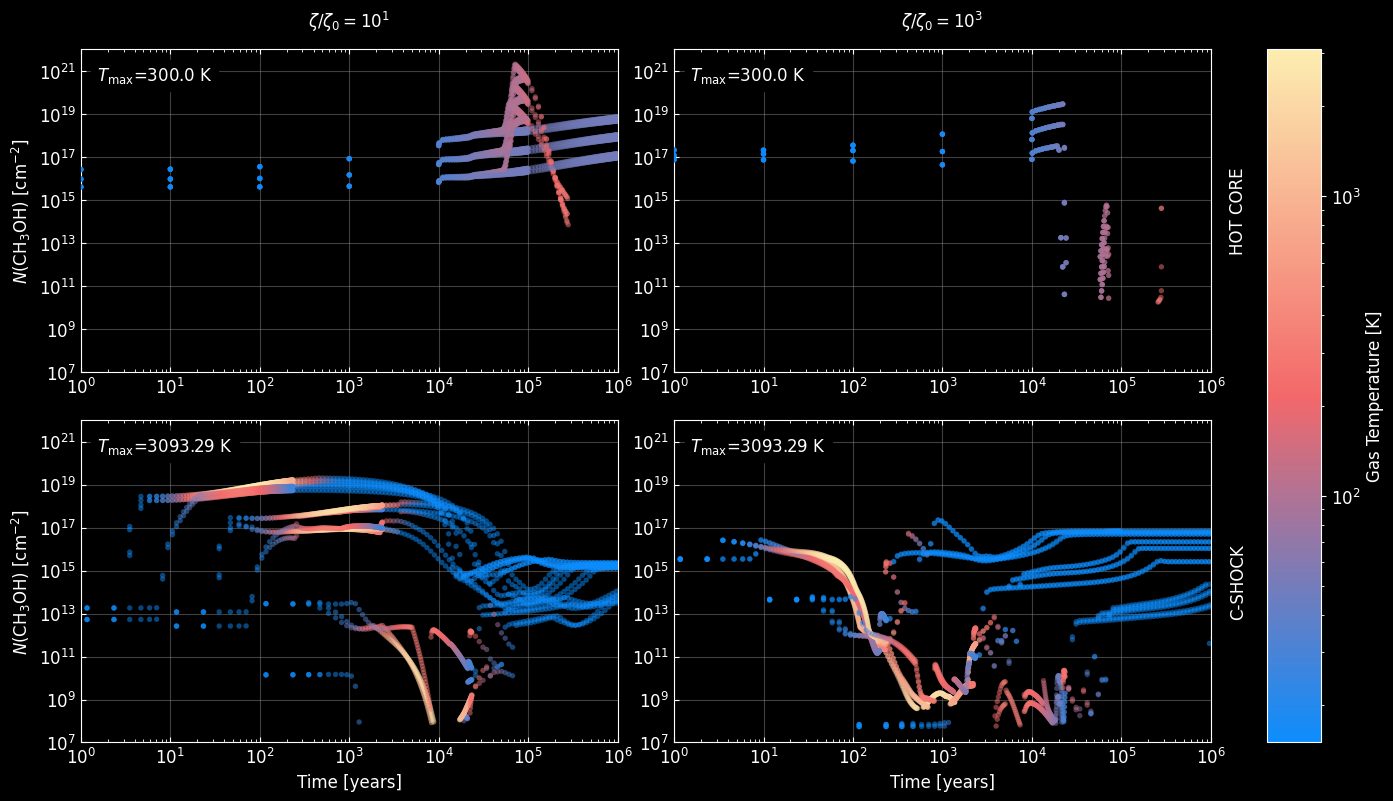

In [13]:
fig = plt.figure(figsize=(16, 9))
gs = GridSpec(2, 2+1, figure=fig, width_ratios=2*[10]+[1],
              wspace=0.15, hspace=0.15)

norm = colors.LogNorm(vmin=dfDic[constants.SHOCK]['gasTemp'].min(), vmax=dfDic[constants.SHOCK]['gasTemp'].max())
cmap=sns.blend_palette(['#0d8dfd','#f3686a','#fcedb0'], as_cmap=True)

for tipo, df in dfDic.items():
    i = 0 if tipo == constants.HOTCORE else 1
    for j, zeta in enumerate([10.0,1000.0]):
        ax=fig.add_subplot(gs[i,j])
        sns.scatterplot(data=df[df['zeta']==zeta], x='Time', y='N_CH3OH',
                        hue='gasTemp', palette=cmap, hue_norm=norm,
                        alpha=0.5, s=15,
                        linewidth=0, ax=ax, zorder=10, legend=None)
        ax.grid(color='grey', alpha=0.5, zorder=2)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xbound(1e0,1e6)
        ax.set_ybound(1e7,1e22)
        ax.tick_params(axis='both', which='both',direction='in', top=True)
        
        ax.set_xlabel(r'Time [years]' if i==1 else None)
        ax.set_ylabel(r'$N$(CH$_3$OH) [cm$^{-2}$]' if j==0 else None)

        ax.text(x=0.03, y=0.95, s=r"$T_\mathrm{max}$"+f"={df[df['zeta']==zeta]['gasTemp'].max()} K",
                backgroundcolor='black',
                horizontalalignment='left',
                verticalalignment='top',
                transform=ax.transAxes)

        if j==1:
            ax.text(1.05, 0.5, tipo.upper() if tipo==constants.HOTCORE else tipo.upper().replace(' ', '-'),
                    horizontalalignment='center',
                    verticalalignment='center',
                    rotation='vertical',
                    transform=ax.transAxes)
        if i==0:
            ax.text(0.5, 1.05, r"$\zeta/\zeta_0=10^1$" if j==0 else r"$\zeta/\zeta_0=10^3$",
                    horizontalalignment='center',
                    verticalalignment='bottom',
                    transform=ax.transAxes)
        
cax=fig.add_subplot(gs[:, -1])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, cax=cax, label='Gas Temperature [K]')
fig.savefig(f"TimeEvolution_CH3OH_columnDensity.png")
# plt.close()

# Box Plots

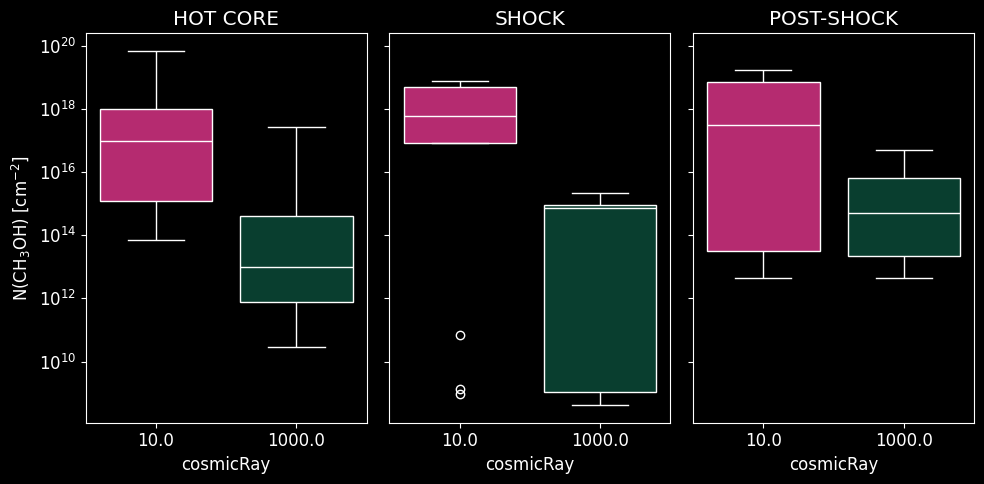

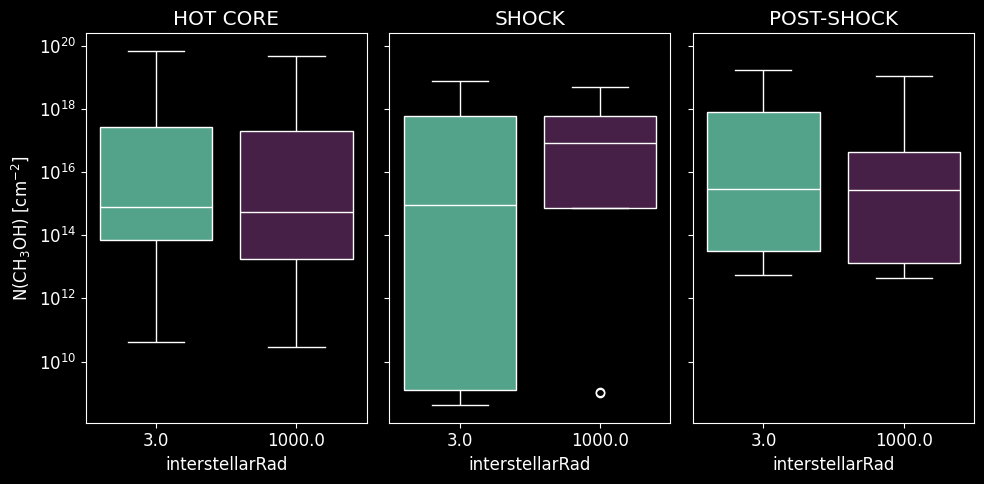

In [14]:
for enfasis in [constants.COSMICRAY, constants.INTERSTELLARRAD]:
    fig, axs = plt.subplots(1,3, figsize=(10,5), layout='tight', sharey=True)
    for i, dic in enumerate(dfDicBox):
        tipo, df = [(k, dic[k])for k in dic][0]
        if tipo==constants.SHOCK: moment = [dic[k] for k in dic][1]
        title = tipo.upper() if tipo==constants.HOTCORE else 'SHOCK' if moment==constants.TMAX else 'POST-SHOCK'

        ax=axs[i]
        sns.boxplot(data=df, x=enfasis,
                    hue=enfasis, legend=None,
                    palette=propColor[enfasis], hue_order=propOrder[tipo][enfasis],
                    order=propOrder[tipo][enfasis],
                    linecolor='white', #linewidth=2,
                    y='N_CH3OH', ax=ax, log_scale=True)
        ax.set_title(title)
        ax.set_xticks(propOrder[tipo][enfasis], labels=propLabels[tipo][enfasis])
    
    axs[0].set_ylabel(r'$N$(CH$_3$OH) [cm$^{-2}$]')
    # fig.savefig(f"BOXPLOT_CH3OH_columnDensity_by{enfasis.upper()}.png")
    # plt.close()

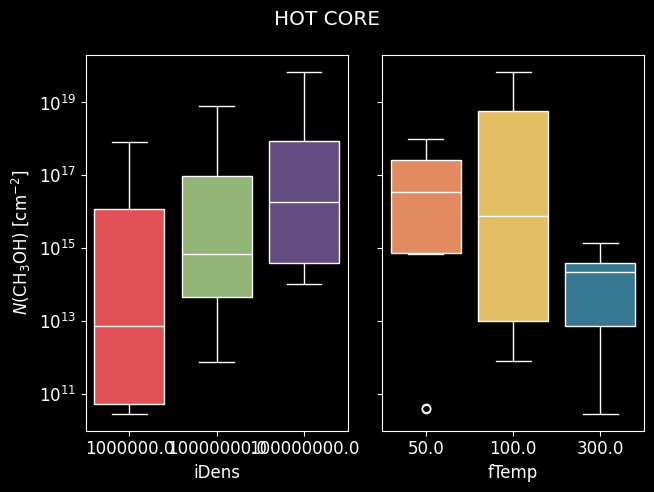

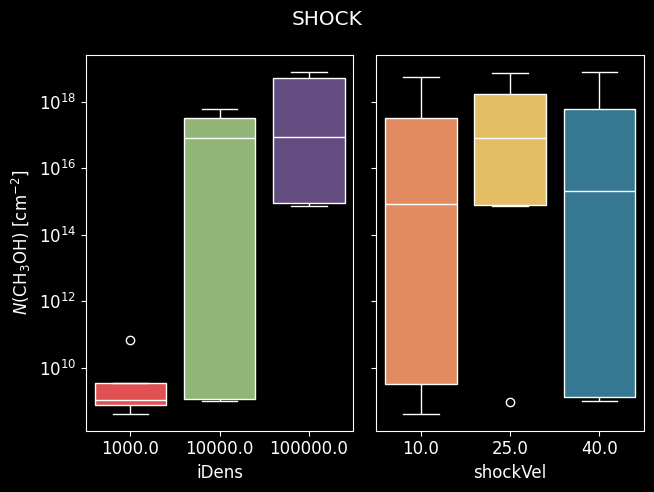

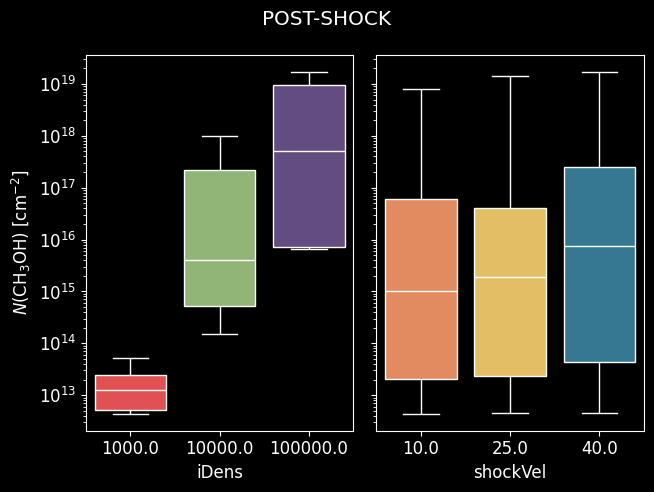

In [21]:
for dic in dfDicBox:
    tipo, df = [(k, dic[k] )for k in dic][0]
    if tipo==constants.SHOCK: moment = [dic[k] for k in dic][1]
    varparam=constants.FTEMP if tipo==constants.HOTCORE else constants.SHOCKVEL
    title = tipo.upper() if tipo==constants.HOTCORE else 'SHOCK' if moment==constants.TMAX else 'POST-SHOCK'

    fig, axs = plt.subplots(1,2, figsize=(6.7,5), layout='tight', sharey=True)

    for i, enfasis in enumerate([constants.IDENS, varparam]):
        sns.boxplot(data=df, x=enfasis,
                    hue=enfasis, legend=None,
                    palette=propColor[enfasis], hue_order=propOrder[tipo][enfasis],
                    order=propOrder[tipo][enfasis],
                    linecolor='white', #linewidth=2,
                    y='N_CH3OH', log_scale=True,
                    ax=axs[i])
        
    axs[0].set_ylabel(r'$N$(CH$_3$OH) [cm$^{-2}$]')
    fig.suptitle(title)
    fig.savefig(f"BOXPLOT_CH3OH_columnDensity_by{title}.png")
    # plt.close()

# Extra Plots

In [70]:
def abunDf(df, cols=['runName', 'shockVel', 'Density', 'Time', 'cosmicRay','av', 'gasTemp', 'iDens', 'radfield','interstellarRad', 'zeta', 'moment']):
    testdf= pd.concat([df[cols+['N_CH3OH']], df[cols+['N_#CH3OH']]], ignore_index=True)
    testdf['species']=testdf.apply(lambda row: '#CH3OH' if np.isnan(row['N_CH3OH']) else 'CH3OH', axis=1)
    testdf['N']=testdf.apply(lambda row: row['N_#CH3OH'] if np.isnan(row['N_CH3OH']) else row['N_CH3OH'], axis=1)

    return testdf[cols+['species','N']]

In [85]:
dfhc_extra=pl.buildDataframe(constants.HOTCORE, constants.folder, constants.physical, ['CH3OH','#CH3OH'], singleDf=True)
dfsh_extra=pl.buildDataframe(constants.SHOCK, constants.folder, constants.physical, ['CH3OH','#CH3OH'], singleDf=True)

hcdf_extra=pl.boxplotDF(dfhc_extra, ['CH3OH','#CH3OH'], constants.physical, constants.HOTCORE)
shdf_tmax_extra=pl.boxplotDF(dfsh_extra, ['CH3OH','#CH3OH'], constants.physical, constants.SHOCK)
shdf_cooldown_extra=pl.boxplotDF(dfsh_extra, ['CH3OH','#CH3OH'], constants.physical, constants.SHOCK, maxT=False)

shdf_cooldown_extra['moment']='POST-SHOCK'
shdf_tmax_extra['moment']='SHOCK'

shdf_extra=pd.concat([shdf_cooldown_extra,shdf_tmax_extra], ignore_index=True)

shdf_extra=abunDf(shdf_extra)
hcdf_extra=abunDf(hcdf_extra, cols=['runName', 'Density', 'Time', 'cosmicRay','av', 'gasTemp', 'fTemp','iDens', 'radfield','interstellarRad', 'zeta'])

shdf_extra[constants.SHOCKVEL] = shdf_extra[constants.SHOCKVEL].astype(str)

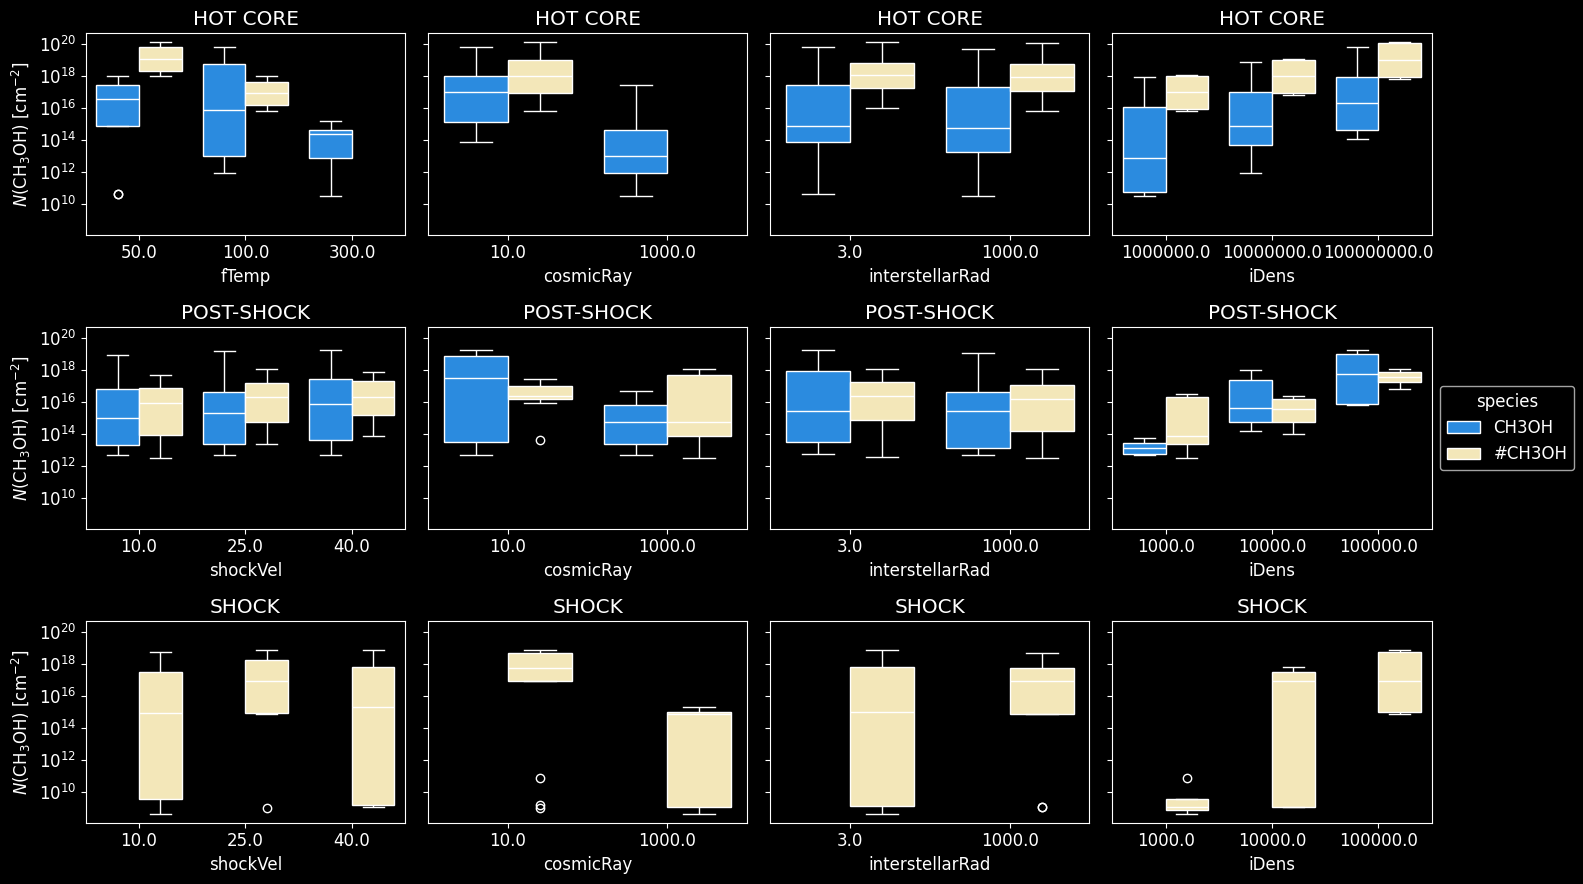

In [97]:
fig, axs = plt.subplots(3,4, figsize=(16,9), layout='tight', sharey=True)

for i, moment in enumerate([constants.HOTCORE,'POST-SHOCK','SHOCK']):
    if moment==constants.HOTCORE:
        tipo = constants.HOTCORE
        df = hcdf_extra
    else:
        tipo = constants.SHOCK
        df = shdf_extra[shdf_extra['moment']==moment]
    title = moment.upper()

    for j, enfasis in enumerate(propOrder[tipo]):
        ax=axs[i][j]
        sns.boxplot(data=df, x=enfasis,
                    hue='species', legend= 'auto' if i==1 and j==3 else None,
                    palette=['#0d8dfd','#fcedb0'],
                    order=propOrder[tipo][enfasis],
                    linecolor='white',
                    y='N', ax=ax, log_scale=True)
        if i==1 and j==3: sns.move_legend(ax, 'center left', bbox_to_anchor=(1, 0.5))
        ax.set_title(title)
        ax.set_xticks(propOrder[tipo][enfasis], labels=propLabels[tipo][enfasis])
    
    axs[i][0].set_ylabel(r'$N$(CH$_3$OH) [cm$^{-2}$]')
fig.savefig(f"BOXPLOT_surfaceVSgas_extra.png")
# plt.close()